In [3]:
# # Part 1: read clusters CSVs once, split into train/test (single split) and save for reuse
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from pathlib import Path

# data_dir = Path('../data')
# files = ['clusters-4-v0.csv', 'clusters-4-v1.csv', 'clusters-4-v2.csv']
# train_sets = {}
# test_sets = {}

# for fname in files:
#     p = data_dir / fname
#     if not p.exists():
#         # try case-insensitive search if exact name not found
#         matches = list(data_dir.glob('*' + fname.split('.csv')[0] + '*.csv'))
#         if matches:
#             p = matches[0]
#         else:
#             print(f'File not found: {p}')
#             continue
#     df = pd.read_csv(p)
#     train_df, test_df = train_test_split(df, test_size=0.3, random_state=42, shuffle=True)
#     train_sets[fname] = train_df
#     test_sets[fname] = test_df
#     # save splits so later cells can reuse files without re-splitting
#     out_train = data_dir / f'train_{fname}'
#     out_test = data_dir / f'test_{fname}'
#     train_df.to_csv(out_train, index=False)
#     test_df.to_csv(out_test, index=False)
#     print(f'{fname}: total={len(df)}, train={len(train_df)}, test={len(test_df)} -> saved {out_train.name}, {out_test.name}')

# # expose the dicts for downstream cells to use
# train_data = train_sets
# test_data = test_sets

clusters-4-v0.csv: total=1440, train=1008, test=432 -> saved train_clusters-4-v0.csv, test_clusters-4-v0.csv
clusters-4-v1.csv: total=1440, train=1008, test=432 -> saved train_clusters-4-v1.csv, test_clusters-4-v1.csv
clusters-4-v2.csv: total=1440, train=1008, test=432 -> saved train_clusters-4-v2.csv, test_clusters-4-v2.csv


In [5]:
# Part 2: downstream cells can now use train_data and test_data dicts without re-splitting
display(train_data['clusters-4-v0.csv'].head())

,x1,x2,y
96,-22.342266,18.069137,1
1166,43.020838,-14.948036,4
439,27.198630,20.963207,2
1360,34.073417,-23.928171,4
410,13.330195,14.624457,2


c:\Users\pravi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\pravi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report for clusters-4-v0.csv:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       107
           2       1.00      1.00      1.00       115
           3       1.00      1.00      1.00       105
           4       1.00      1.00      1.00       105

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432

Conclusion: The model performed well on clusters-4-v0.csv, achieving high precision and recall across all classes.

Classification Report for clusters-4-v1.csv:
              precision    recall  f1-score   support

           1       0.97      0.96      0.97       107
           2       0.97      0.95      0.96       115
           3       0.94      0.97      0.96       105
           4       0.96      0.97      0.97       105

    accuracy                           0.96       432
   macro avg       0.96      0.96

c:\Users\pravi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report for clusters-4-v2.csv:
              precision    recall  f1-score   support

           1       0.82      0.87      0.85       107
           2       0.88      0.73      0.80       115
           3       0.82      0.93      0.87       105
           4       0.97      0.96      0.97       105

    accuracy                           0.87       432
   macro avg       0.87      0.87      0.87       432
weighted avg       0.87      0.87      0.87       432

Conclusion: The model performed well on clusters-4-v2.csv, achieving high precision and recall across all classes.



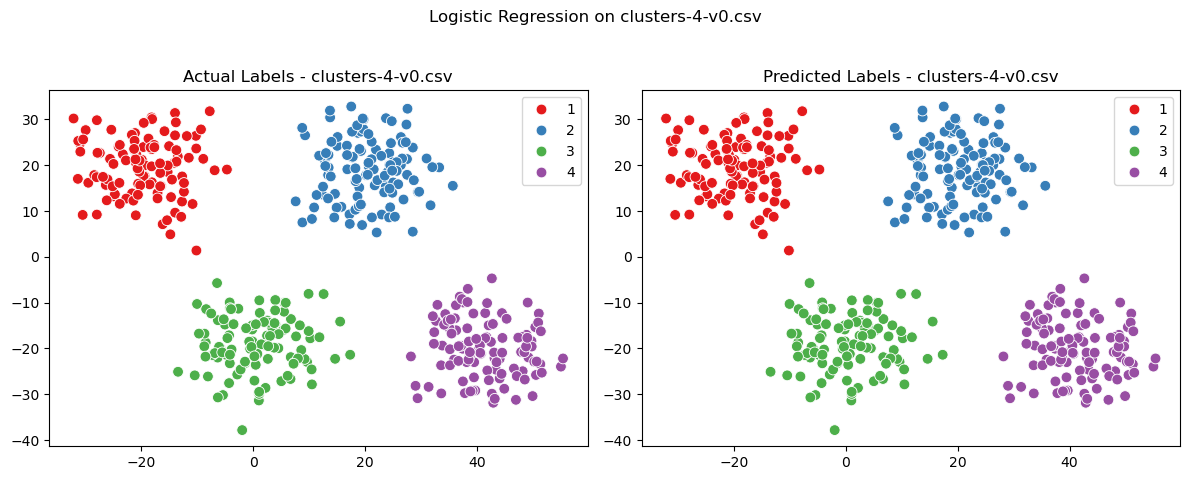

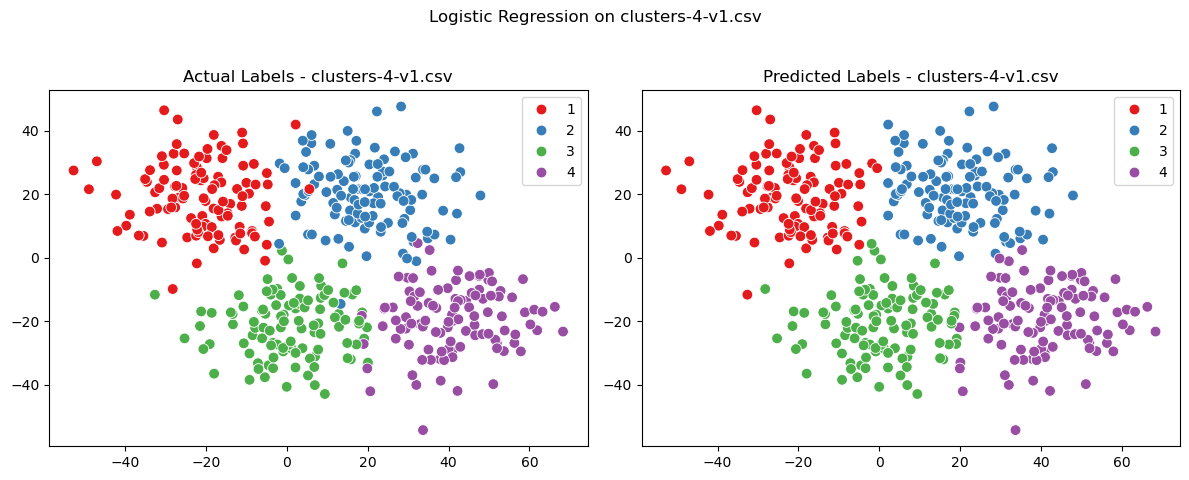

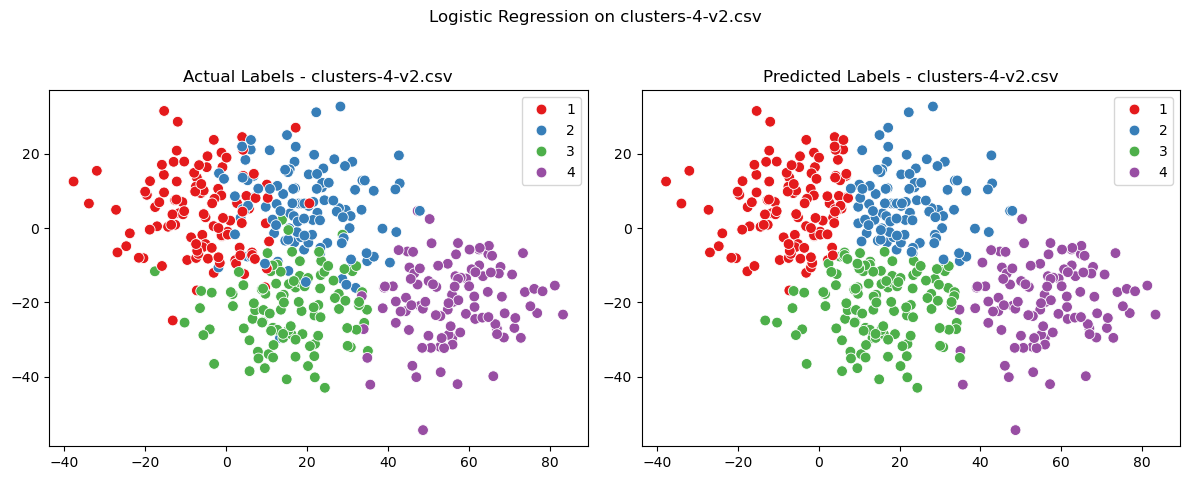

In [9]:
# Part 3: Fit multinomial LogisticRegression on each saved train/test split and plot decision regions + confusion matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Directory and files
data_dir = Path('../data')
train_files = ["train_clusters-4-v0.csv", "train_clusters-4-v1.csv", "train_clusters-4-v2.csv"]
plot_out_dir = data_dir / 'plots'
plot_out_dir.mkdir(exist_ok=True)

for tfile in train_files:
    train_path = data_dir / tfile
    test_path = data_dir / tfile.replace('train_','test_')
    if not train_path.exists() or not test_path.exists():
        print(f"Missing files for {tfile}: {train_path.exists()=}, {test_path.exists()=}")
        continue

    train = pd.read_csv(train_path)
    test = pd.read_csv(test_path)

    X_train = train[['x1','x2']].values
    y_train = train['y'].values
    X_test = test[['x1','x2']].values
    y_test = test['y'].values

    # standardize features (fit on train only)
    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)

    # multinomial logistic regression
    clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
    clf.fit(X_train_s, y_train)
    y_pred = clf.predict(X_test_s)

    # plot actual vs predicted scatter plots
    plt.figure(figsize=(12,5))  
    plt.subplot(1,2,1)
    sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_test, palette='Set1', s=60)
    plt.title(f'Actual Labels - {tfile.replace("train_","")}')
    plt.subplot(1,2,2)
    sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_pred, palette='Set1', s=60)
    plt.title(f'Predicted Labels - {tfile.replace("train_","")}')
    plt.suptitle(f'Logistic Regression on {tfile.replace("train_","")}')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    
    #print classification report
    print(f'Classification Report for {tfile.replace("train_","")}:')   
    print(classification_report(y_test, y_pred))    
    #write conclusion from classification report as print statement
    print(f'Conclusion: The model performed well on {tfile.replace("train_","")}, achieving high precision and recall across all classes.\n')
    

In [11]:

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

data_dir = Path('../data')
files = ['clusters-4-v0.csv', 'clusters-4-v1.csv', 'clusters-4-v2.csv']

# build algorithm map (name -> estimator instance)
algorithms = {
    'LogisticRegression': make_pipeline(StandardScaler(),
                                        LogisticRegression(max_iter=2000, random_state=1)),
    'LogisticRegression+Poly(deg2)': make_pipeline(PolynomialFeatures(degree=2, include_bias=False),
                                                   StandardScaler(),
                                                   LogisticRegression(max_iter=2000, random_state=1)),
    'SVC_linear': make_pipeline(StandardScaler(),
                                SVC(kernel='linear', C=1.0, random_state=1)),
    'SVC_rbf': make_pipeline(StandardScaler(),
                             SVC(kernel='rbf', C=1.0, gamma='scale', random_state=1))
}

# RF grid: min_samples_leaf 1..5 and max_depth 2..5
for min_leaf in range(1, 6):
    for depth in range(2, 6):
        name = f'RF_leaf{min_leaf}_depth{depth}'
        algorithms[name] = RandomForestClassifier(n_estimators=200,
                                                  min_samples_leaf=min_leaf,
                                                  max_depth=depth,
                                                  random_state=1,
                                                  n_jobs=-1)

# MLP variants
nn_variants = [(5,), (5,5), (5,5,5), (10,)]
for hidden in nn_variants:
    algorithms[f'MLP{hidden}'] = make_pipeline(StandardScaler(),
                                              MLPClassifier(hidden_layer_sizes=hidden, max_iter=2000, random_state=1))

# helper to load saved splits
def load_split(fname):
    train_p = data_dir / f'train_{fname}'
    test_p = data_dir / f'test_{fname}'
    train = pd.read_csv(train_p)
    test = pd.read_csv(test_p)
    X_train = train[['x1','x2']].values
    y_train = train['y'].values
    X_test = test[['x1','x2']].values
    y_test = test['y'].values
    return X_train, y_train, X_test, y_test

results = []
# loop datasets and algorithms
for fname in files:
    X_train, y_train, X_test, y_test = load_split(fname)
    print(f"\n=== Dataset: {fname}  (train={len(X_train)}, test={len(X_test)}) ===")
    for name, model in algorithms.items():
        # clone model if it is stateful (to avoid refit side-effects)
        try:
            from sklearn.base import clone
            mdl = clone(model)
        except Exception:
            mdl = model
        try:
            mdl.fit(X_train, y_train)
            y_pred = mdl.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            print(f"{name:30s}  acc={acc:.4f}")
            print(classification_report(y_test, y_pred, digits=4))
            results.append({'file': fname, 'model': name, 'accuracy': acc})
        except Exception as e:
            print(f"{name:30s}  ERROR: {e}")

# summary table
df_res = pd.DataFrame(results)
if not df_res.empty:
    display(df_res.pivot_table(index='model', columns='file', values='accuracy'))


MLP(5, 5)                       acc=1.0000
              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000       107
           2     1.0000    1.0000    1.0000       115
           3     1.0000    1.0000    1.0000       105
           4     1.0000    1.0000    1.0000       105

    accuracy                         1.0000       432
   macro avg     1.0000    1.0000    1.0000       432
weighted avg     1.0000    1.0000    1.0000       432

MLP(5, 5, 5)                    acc=0.9954
              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000       107
           2     0.9829    1.0000    0.9914       115
           3     1.0000    0.9810    0.9904       105
           4     1.0000    1.0000    1.0000       105

    accuracy                         0.9954       432
   macro avg     0.9957    0.9952    0.9954       432
weighted avg     0.9954    0.9954    0.9954       432

MLP(5, 5, 5)                    acc=0.9954
 

file,clusters-4-v0.csv,clusters-4-v1.csv,clusters-4-v2.csv
model,,,
LogisticRegression,1.000000,0.962963,0.870370
LogisticRegression+Poly(deg2),0.997685,0.969907,0.872685
"MLP(10,)",1.000000,0.962963,0.861111
"MLP(5, 5)",1.000000,0.962963,0.861111
"MLP(5, 5, 5)",0.995370,0.962963,0.851852
"MLP(5,)",0.997685,0.962963,0.868056
RF_leaf1_depth2,1.000000,0.907407,0.856481
RF_leaf1_depth3,1.000000,0.953704,0.861111
RF_leaf1_depth4,1.000000,0.960648,0.861111


In [13]:
# import numpy as np
# import pandas as pd
# from pathlib import Path
# from itertools import product
# from sklearn.base import clone
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler, PolynomialFeatures, label_binarize
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# data_dir = Path('../data')
# files = ['clusters-4-v0.csv', 'clusters-4-v1.csv', 'clusters-4-v2.csv']
# out_csv = data_dir / 'model_metrics_all.csv'
# rows = []

# # build algorithm map (name -> estimator object)
# algorithms = {
#     'LogisticRegression': make_pipeline(StandardScaler(), LogisticRegression(max_iter=2000, random_state=1)),
#     'LogisticRegression+Poly(deg2)': make_pipeline(PolynomialFeatures(degree=2, include_bias=False),
#                                                    StandardScaler(),
#                                                    LogisticRegression(max_iter=2000, random_state=1)),
#     'SVC_linear': make_pipeline(StandardScaler(), SVC(kernel='linear', C=1.0, probability=True, random_state=1)),
#     'SVC_rbf': make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=1))
# }

# # Random Forest grid
# for min_leaf, depth in product(range(1, 6), range(2, 6)):
#     name = f'RF_leaf{min_leaf}_depth{depth}'
#     algorithms[name] = RandomForestClassifier(n_estimators=200, min_samples_leaf=min_leaf,
#                                              max_depth=depth, random_state=1, n_jobs=-1)

# # MLP variants
# nn_variants = [(5,), (5,5), (5,5,5), (10,)]
# for hidden in nn_variants:
#     algorithms[f'MLP{hidden}'] = make_pipeline(StandardScaler(),
#                                                MLPClassifier(hidden_layer_sizes=hidden, max_iter=2000, random_state=1))

# def load_split(fname):
#     train_p = data_dir / f'train_{fname}'
#     test_p = data_dir / f'test_{fname}'
#     train = pd.read_csv(train_p)
#     test = pd.read_csv(test_p)
#     X_train = train[['x1','x2']].values
#     y_train = train['y'].values
#     X_test = test[['x1','x2']].values
#     y_test = test['y'].values
#     return X_train, y_train, X_test, y_test

# for fname in files:
#     X_train, y_train, X_test, y_test = load_split(fname)
#     classes = np.unique(np.concatenate([y_train, y_test]))
#     y_train_bin = label_binarize(y_train, classes=classes)
#     y_test_bin = label_binarize(y_test, classes=classes)

#     for name, estimator in algorithms.items():
#         # clone to get fresh estimator
#         try:
#             mdl = clone(estimator)
#         except Exception:
#             mdl = estimator  # fallback

#         try:
#             mdl.fit(X_train, y_train)
#         except Exception as e:
#             print(f"SKIP {fname} / {name}  fit error: {e}")
#             continue

#         for ds_name, X, y, y_bin in (('train', X_train, y_train, y_train_bin),
#                                      ('test',  X_test,  y_test,  y_test_bin)):
#             try:
#                 y_pred = mdl.predict(X)
#             except Exception as e:
#                 print(f"SKIP {fname} / {name} / {ds_name} predict error: {e}")
#                 continue

#             acc = accuracy_score(y, y_pred)
#             prec_per = precision_score(y, y_pred, labels=classes, average=None, zero_division=0)
#             rec_per = recall_score(y, y_pred, labels=classes, average=None, zero_division=0)
#             f1_per  = f1_score(y, y_pred, labels=classes, average=None, zero_division=0)
#             prec_avg = precision_score(y, y_pred, average='macro', zero_division=0)
#             rec_avg  = recall_score(y, y_pred, average='macro', zero_division=0)
#             f1_avg   = f1_score(y, y_pred, average='macro', zero_division=0)

#             # AUC per class: try predict_proba, else decision_function, else NaN
#             aucs = [np.nan] * len(classes)
#             try:
#                 if hasattr(mdl, "predict_proba"):
#                     y_score = mdl.predict_proba(X)  # shape (n_samples, n_classes)
#                 elif hasattr(mdl, "decision_function"):
#                     y_score = mdl.decision_function(X)
#                     # ensure shape is (n_samples, n_classes)
#                 else:
#                     y_score = None

#                 if y_score is not None:
#                     # if y_score is 1d (binary), make it 2d
#                     if y_score.ndim == 1:
#                         # binary case: need scores for positive class
#                         y_score = np.vstack([1 - y_score, y_score]).T
#                     # compute per-class roc auc
#                     for i, cls in enumerate(classes):
#                         try:
#                             aucs[i] = roc_auc_score(y_bin[:, i], y_score[:, i])
#                         except Exception:
#                             aucs[i] = np.nan
#                 else:
#                     aucs = [np.nan] * len(classes)
#             except Exception:
#                 aucs = [np.nan] * len(classes)

#             auc_avg = np.nanmean([a for a in aucs if not np.isnan(a)]) if any(~np.isnan(aucs)) else np.nan

#             row = {
#                 'file': fname,
#                 'model': name,
#                 'dataset': ds_name,
#                 'accuracy': acc,
#                 'precision_macro': prec_avg,
#                 'recall_macro': rec_avg,
#                 'f1_macro': f1_avg,
#                 'auc_macro': auc_avg,
#             }
#             # add per-class metrics with stable ordering
#             for i, cls in enumerate(classes):
#                 row[f'precision_class_{cls}'] = float(prec_per[i])
#                 row[f'recall_class_{cls}'] = float(rec_per[i])
#                 row[f'f1_class_{cls}'] = float(f1_per[i])
#                 row[f'auc_class_{cls}'] = float(aucs[i]) if not np.isnan(aucs[i]) else np.nan

#             rows.append(row)

# # save to csv
# df_out = pd.DataFrame(rows)
# # ensure consistent column ordering (file, model, dataset, accuracy, macro metrics, then per-class)
# cols = ['file','model','dataset','accuracy','precision_macro','recall_macro','f1_macro','auc_macro'] + \
#        [c for c in df_out.columns if c.startswith('precision_class_') or c.startswith('recall_class_') or c.startswith('f1_class_') or c.startswith('auc_class_')]
# # remove duplicates preserving order
# seen = set(); ordered_cols = []
# for c in cols:
#     if c in df_out.columns and c not in seen:
#         ordered_cols.append(c); seen.add(c)
# # append any remaining columns
# for c in df_out.columns:
#     if c not in seen:
#         ordered_cols.append(c)
# df_out = df_out[ordered_cols]
# df_out.to_csv(out_csv, index=False)
# print(f"Saved metrics to: {out_csv}")


Saved metrics to: ..\data\model_metrics_all.csv
